In [ ]:
#|default_exp

# Creating an application from an AI model

### Imports

In [1]:
#|export
from fastai.vision.all import * 
import gradio as gr

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


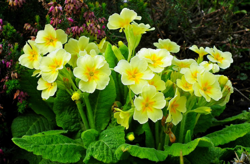

In [2]:
im = PILImage.create('primrose.jpg')
im.thumbnail([250,250])
im

### Creating the classifier

In [3]:
#|export
learner = load_learner('models/first_classifier.pkl')

/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [4]:
%time learner.predict(im)

CPU times: user 4.43 s, sys: 591 ms, total: 5.02 s
Wall time: 358 ms


('primrose',
 tensor(2),
 tensor([2.1528e-08, 3.7403e-07, 1.0000e+00, 3.3626e-08, 6.6283e-09]))

In [5]:
#|export
categories = learner.dls.vocab

def classify_image(img) : 
    pred, idx, probs = learner.predict(img)
    return(dict(zip(categories, map(float, probs))))

In [6]:
classify_image(im)

{'geranium': 2.1527988280922727e-08,
 'orchid': 3.74025091787189e-07,
 'primrose': 0.9999996423721313,
 'rose': 3.3625745743393054e-08,
 'tulip': 6.628264159758146e-09}

### Creating the gradio interface

In [7]:
#|export
image = gr.Image()
label = gr.Label()
examples = ['primrose.lpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
